### Codebook for study 1.

#### To supplement main analysis in the manuscript, here we provide:
#### 1. descriptive summaries (e.g., number of participants);
#### 2. response visualizations (e.g., partner choices and reward estimates, by condition); 
#### 3. variable transformations (e.g., raw score to herfindhal/variance);
#### 4. primary and exploratory results visualizations:
- partner choice herfindahl and reward estimation variance, by condition; 
- warmth/competence stereotype dispersion, by condition.

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#### Descriptive summaries

In [2]:
# read data: study1clean spreadsheet.
df_clean = pd.read_excel('study1data.xlsx',sheet_name=1)

# descriptive summary.
df_clean.groupby(['reward','bias','sampling']).size()

reward     bias  sampling
different  no    meet        42
                 select      58
           yes   meet        44
                 select      56
identical  no    meet        45
                 select      55
           yes   meet        47
                 select      52
dtype: int64

#### Partner choice visualizations

In [3]:
# read data: study1clean spreadsheet
df_choice = pd.read_excel('study1data.xlsx',sheet_name=2)

# re-order: rank by times of choosing each group.
countdf = df_choice.groupby(['participant', 'choice','reward','bias','sampling']).count()
reorderdf = countdf.sort_values(by=['participant', 'choice1'], ascending=False)
reorderdf['reorder'] = reorderdf.groupby(['participant']).cumcount()+1; reorderdf
reorder_choicedf = reorderdf.reset_index()
print(reorder_choicedf)

      participant choice     reward bias sampling  round  choice1  reorder
0             399   Aima  different   no     meet     10       10        1
1             399   Reku  different   no     meet     10       10        2
2             399   Tufa  different   no     meet     10       10        3
3             399   Weki  different   no     meet     10       10        4
4             398   Reku  different   no   select     34       34        1
...           ...    ...        ...  ...      ...    ...      ...      ...
1460            2   Tufa  identical   no   select      1        1        4
1461            1   Aima  identical   no   select     32       32        1
1462            1   Reku  identical   no   select      6        6        2
1463            1   Tufa  identical   no   select      1        1        3
1464            1   Weki  identical   no   select      1        1        4

[1465 rows x 8 columns]


Text(0.5, 0.98, 'reward = identical & bias = no')

<Figure size 432x288 with 0 Axes>

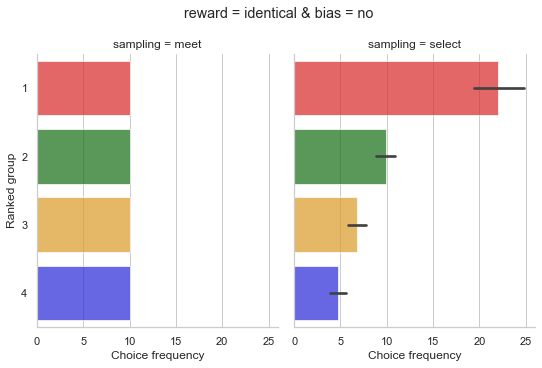

In [46]:
# data by condition
this_df = reorder_choicedf.loc[(reorder_choicedf['reward'] == 'identical') & (reorder_choicedf['bias'] == 'no')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Main plot
g = sns.catplot(y="reorder",x="choice1",col='sampling',
                data=this_df, kind="bar", orient="h",
                height=5, aspect=.75, saturation=.7,
                alpha=.7, col_order=['meet','select'], palette=['red','green','orange','blue']); 
# Change labels
g.set_xlabels('Choice frequency')
g.set_ylabels('Ranked group')

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('reward = identical & bias = no')

Text(0.5, 0.98, 'reward = identical & bias = yes')

<Figure size 432x288 with 0 Axes>

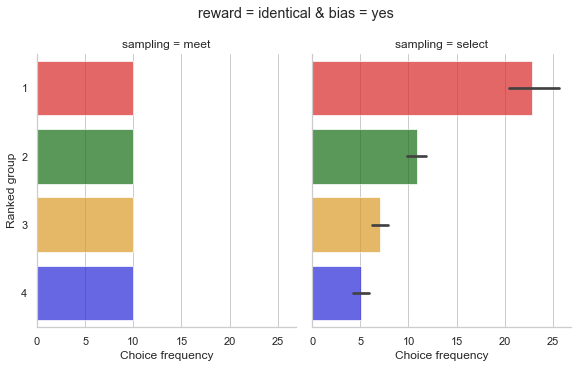

In [47]:
# data by condition
this_df = reorder_choicedf.loc[(reorder_choicedf['reward'] == 'identical') & (reorder_choicedf['bias'] == 'yes')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Main plot
g = sns.catplot(y="reorder",x="choice1",col='sampling',
                data=this_df, kind="bar", orient="h",
                height=5, aspect=.8, saturation=.7,
                alpha=.7, col_order=['meet','select'], palette=['red','green','orange','blue']); 
# Change labels
g.set_xlabels('Choice frequency')
g.set_ylabels('Ranked group')

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('reward = identical & bias = yes')

Text(0.5, 0.98, 'reward = different & bias = no')

<Figure size 432x288 with 0 Axes>

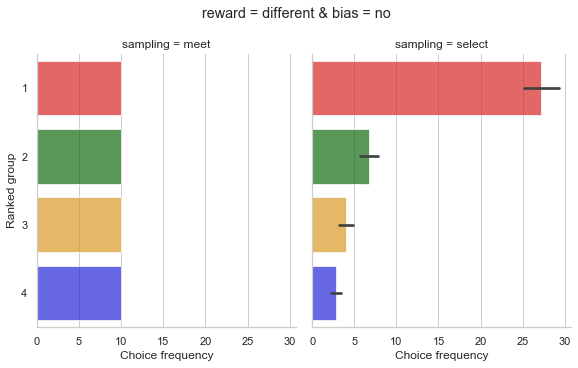

In [48]:
# data by condition
this_df = reorder_choicedf.loc[(reorder_choicedf['reward'] == 'different') & (reorder_choicedf['bias'] == 'no')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Main plot
g = sns.catplot(y="reorder",x="choice1",col='sampling',
                data=this_df, kind="bar", orient="h",
                height=5, aspect=.8, saturation=.7,
                alpha=.7, col_order=['meet','select'], palette=['red','green','orange','blue']); 
# Change labels
g.set_xlabels('Choice frequency')
g.set_ylabels('Ranked group')

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('reward = different & bias = no')

Text(0.5, 0.98, 'reward = different & bias = yes')

<Figure size 432x288 with 0 Axes>

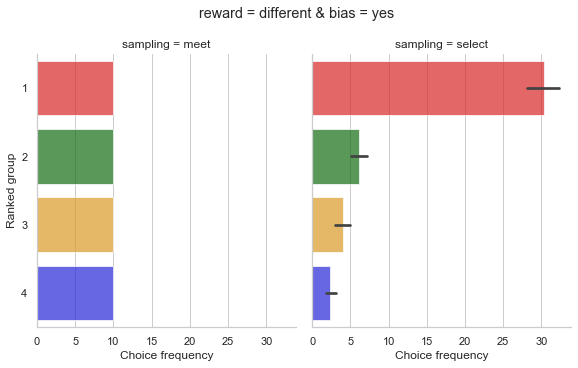

In [49]:
# data by condition
this_df = reorder_choicedf.loc[(reorder_choicedf['reward'] == 'different') & (reorder_choicedf['bias'] == 'yes')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Main plot
g = sns.catplot(y="reorder",x="choice1",col='sampling',
                data=this_df, kind="bar", orient="h",
                height=5, aspect=.8, saturation=.7,
                alpha=.7, col_order=['meet','select'], palette=['red','green','orange','blue']); 
# Change labels
g.set_xlabels('Choice frequency')
g.set_ylabels('Ranked group')

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('reward = different & bias = yes')

Text(0.5, 0.98, 'sampling = select & reward = identical & bias = no')

<Figure size 432x288 with 0 Axes>

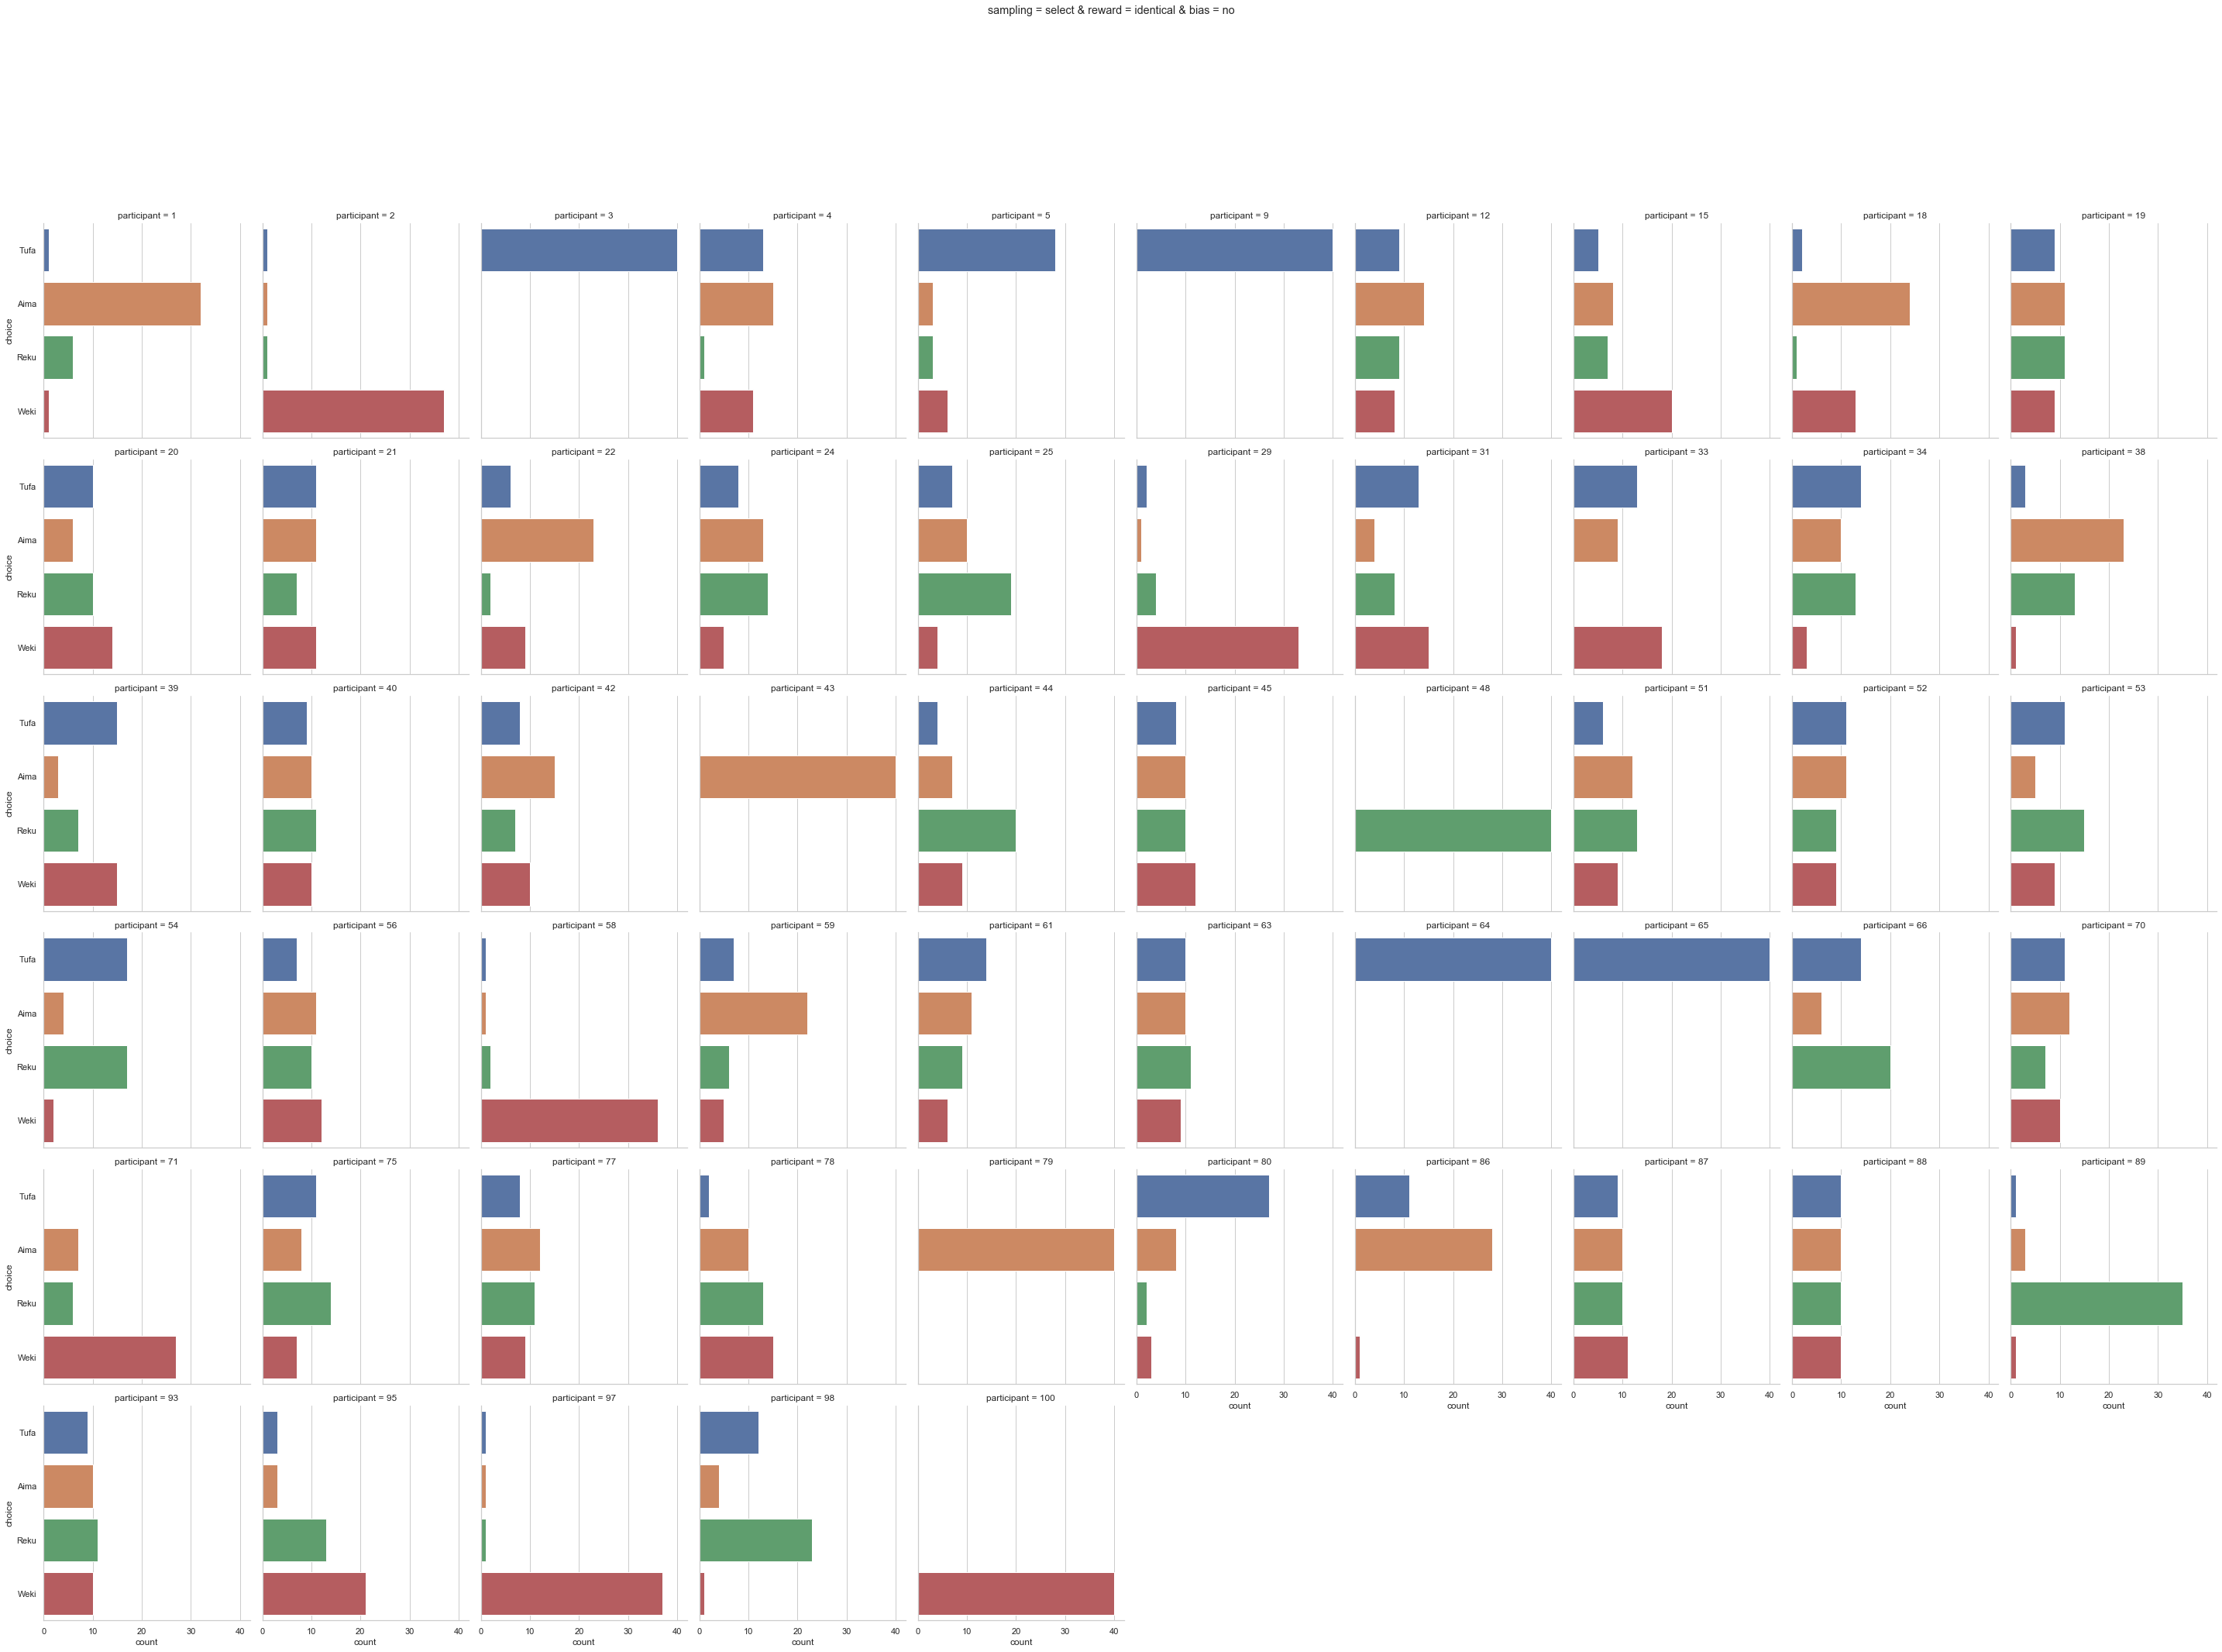

In [9]:
# plot per participant

pp_df = df_choice.loc[(df_choice['reward'] == 'identical') & 
                      (df_choice['sampling'] == 'select') & 
                      (df_choice['bias'] == 'no')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Count plot
g = sns.catplot(y="choice", col="participant", col_wrap = 10,
                data=pp_df, kind="count",
                height=5, aspect=.8,
                order=['Tufa','Aima','Reku','Weki']);

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('sampling = select & reward = identical & bias = no')

Text(0.5, 0.98, 'sampling = select & reward = identical & bias = yes')

<Figure size 432x288 with 0 Axes>

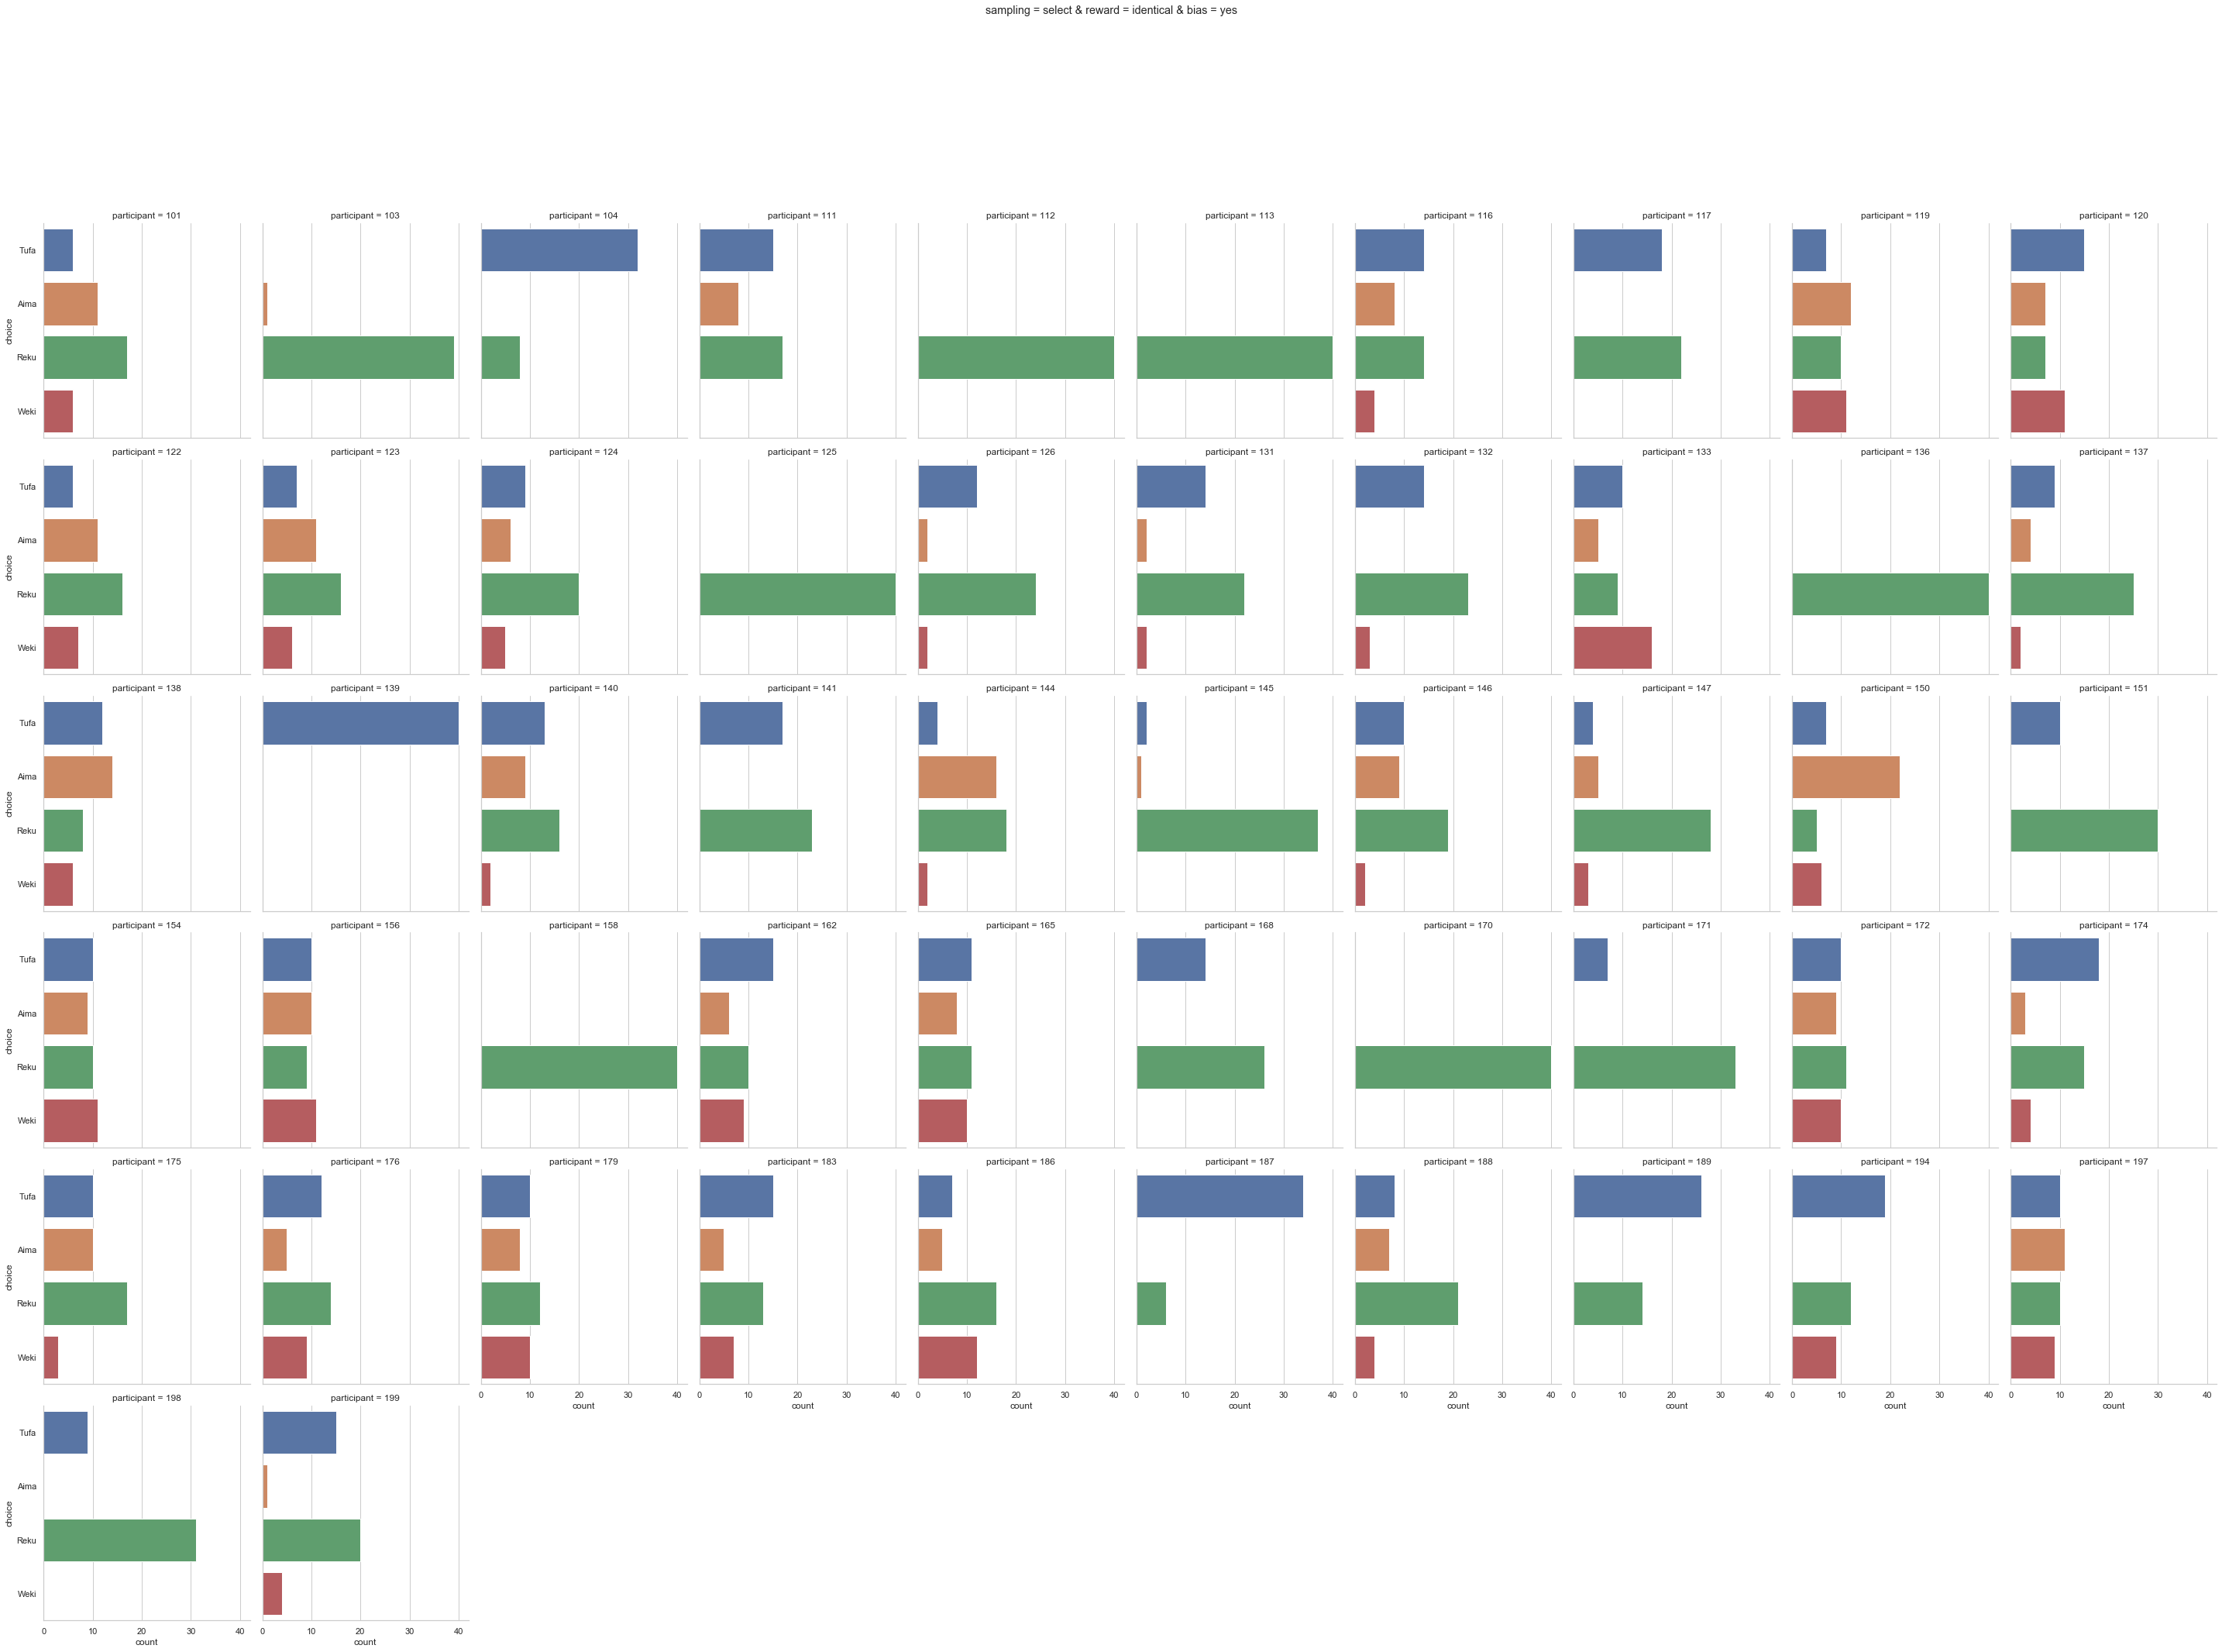

In [10]:
# plot per participant

pp_df = df_choice.loc[(df_choice['reward'] == 'identical') & 
                      (df_choice['sampling'] == 'select') & 
                      (df_choice['bias'] == 'yes')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Count plot
g = sns.catplot(y="choice", col="participant", col_wrap = 10,
                data=pp_df, kind="count",
                height=5, aspect=.8,
                order=['Tufa','Aima','Reku','Weki']);

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('sampling = select & reward = identical & bias = yes')

Text(0.5, 0.98, 'sampling = select & reward = different & bias = no')

<Figure size 432x288 with 0 Axes>

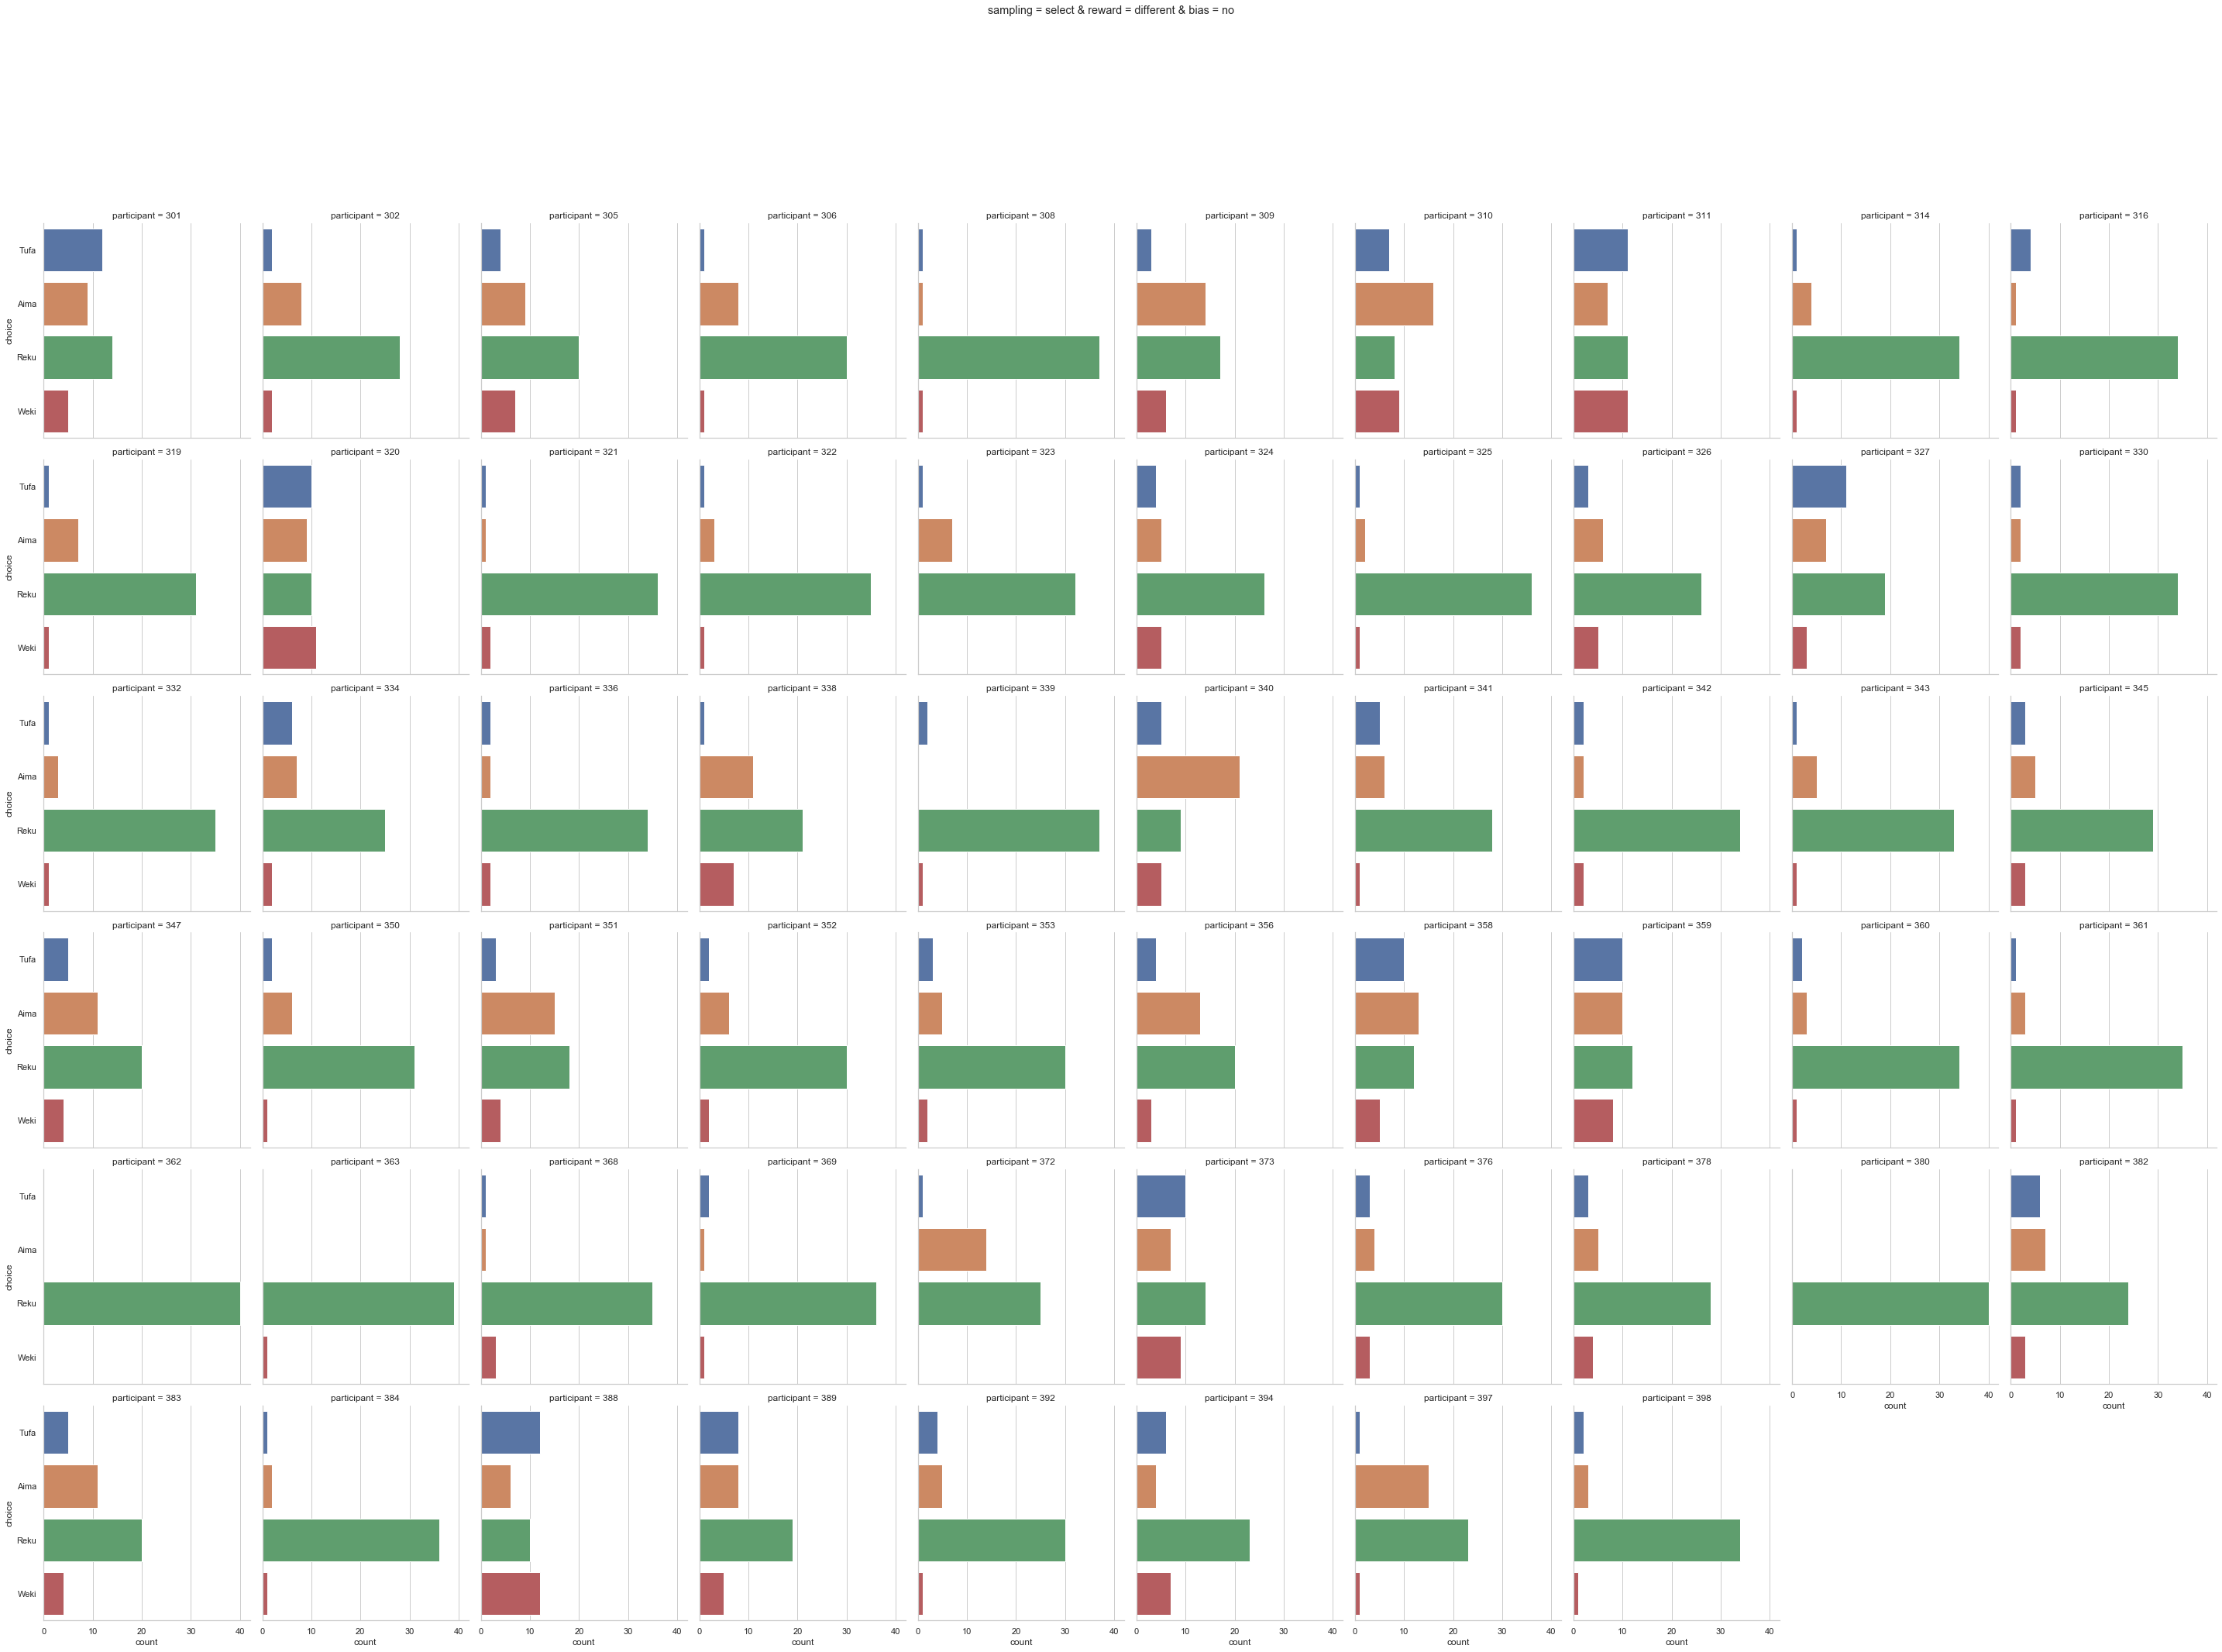

In [11]:
# plot per participant

pp_df = df_choice.loc[(df_choice['reward'] == 'different') & 
                      (df_choice['sampling'] == 'select') & 
                      (df_choice['bias'] == 'no')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Count plot
g = sns.catplot(y="choice", col="participant", col_wrap = 10,
                data=pp_df, kind="count",
                height=5, aspect=.8,
                order=['Tufa','Aima','Reku','Weki']);

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('sampling = select & reward = different & bias = no')

Text(0.5, 0.98, 'sampling = select & reward = different & bias = yes')

<Figure size 432x288 with 0 Axes>

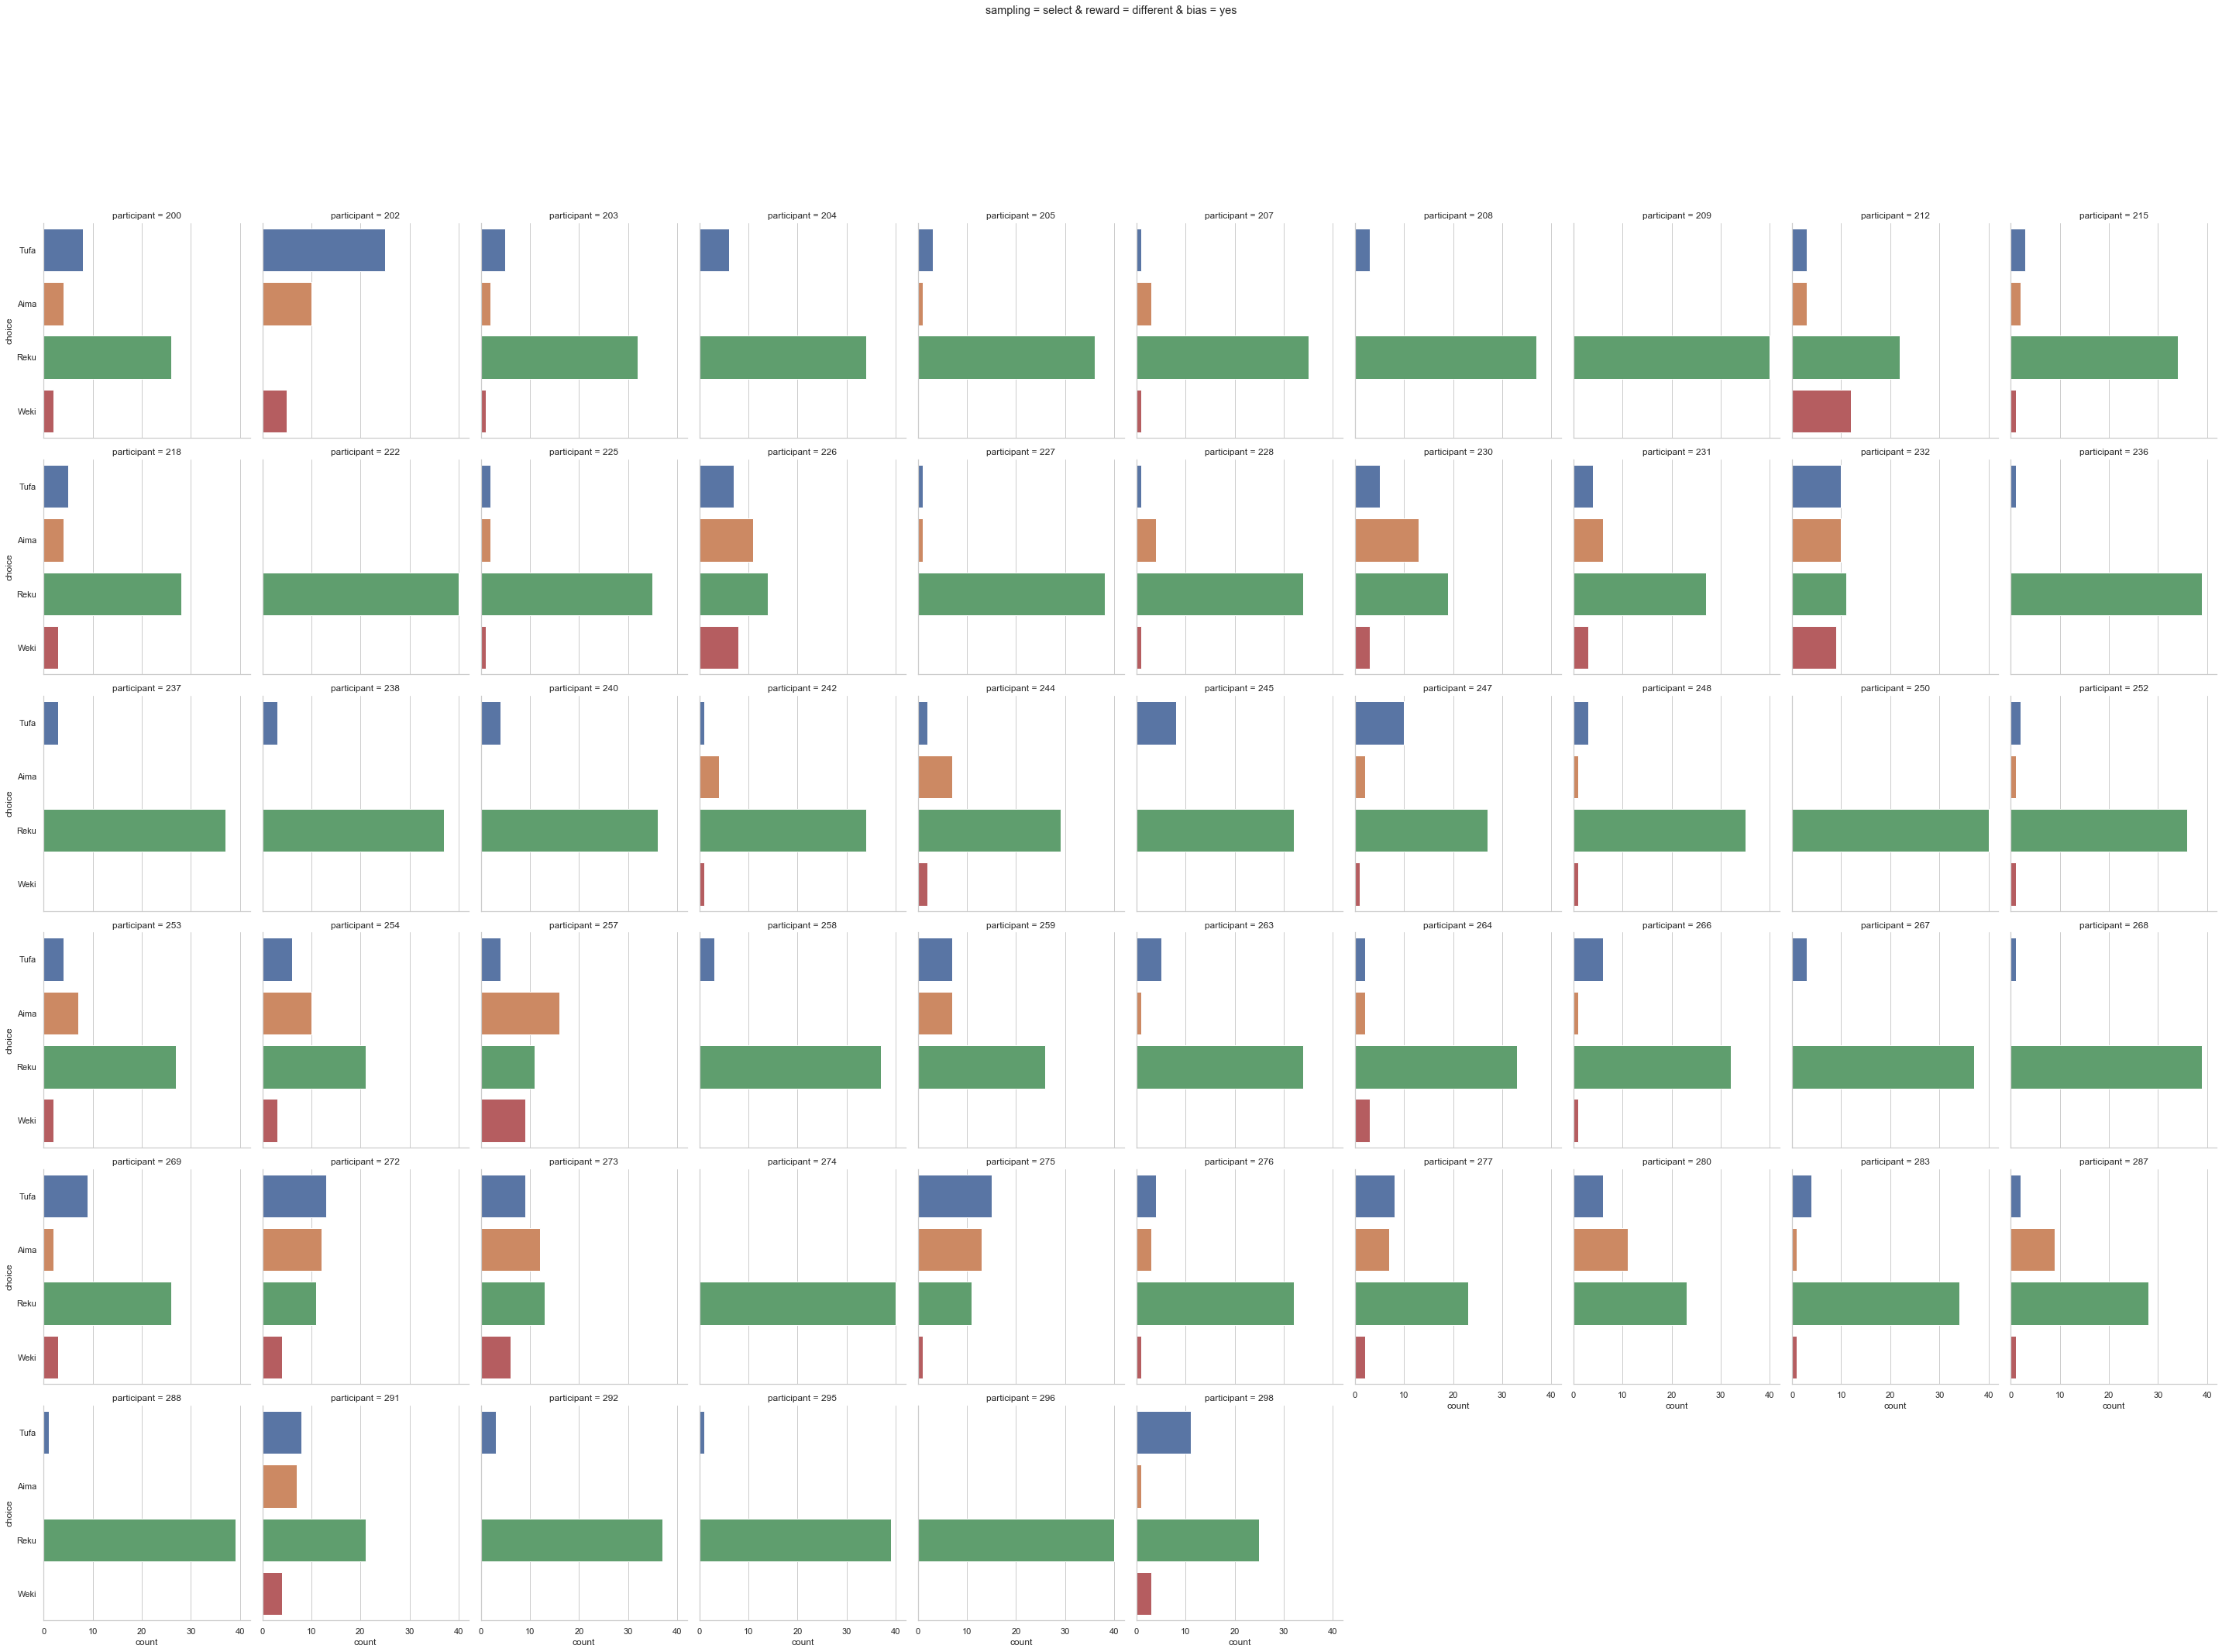

In [12]:
# plot per participant

pp_df = df_choice.loc[(df_choice['reward'] == 'different') & 
                      (df_choice['sampling'] == 'select') & 
                      (df_choice['bias'] == 'yes')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Count plot
g = sns.catplot(y="choice", col="participant", col_wrap = 10,
                data=pp_df, kind="count",
                height=5, aspect=.8,
                order=['Tufa','Aima','Reku','Weki']);

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('sampling = select & reward = different & bias = yes')

#### Reward estimates visualizations

In [50]:
# read data: study1dollar spreadsheet
df_dollar = pd.read_excel('study1data.xlsx',sheet_name=3)

# reorder: by reward ranks
reorder_reward_df = df_dollar.sort_values(by=['participant','reward_estimate'], ascending=False)
reorder_reward_df['reorder'] = reorder_reward_df.groupby(['participant']).cumcount()+1; reorder_reward_df
reorder_dollardf=reorder_reward_df.reset_index()
print(reorder_dollardf)

      index     reward bias sampling  participant group  reward_estimate  \
0      1395  different   no     meet          399  Reku              100   
1      1195  different   no     meet          399  Aima               60   
2       995  different   no     meet          399  Tufa               50   
3      1595  different   no     meet          399  Weki               20   
4      1394  different   no   select          398  Reku               91   
...     ...        ...  ...      ...          ...   ...              ...   
1591    399  identical   no   select            2  Reku                2   
1592    199  identical   no   select            1  Aima               77   
1593    398  identical   no   select            1  Reku               54   
1594    597  identical   no   select            1  Weki               22   
1595      0  identical   no   select            1  Tufa               18   

      reorder  
0           1  
1           2  
2           3  
3           4  
4      

Text(0, 0.5, '')

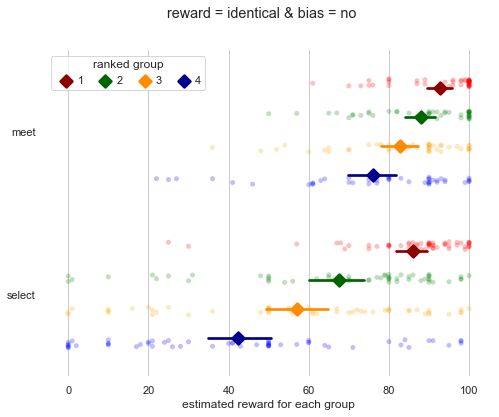

In [82]:
# reward estimate (rank reordered)

this_df = reorder_dollardf.loc[(reorder_dollardf['reward'] == 'identical') & (reorder_dollardf['bias'] == 'no')]

# Initialize the figure
f, ax = plt.subplots()
f.set_size_inches(8,6)
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)
    
    
# Show each observation with a scatterplot
sns.stripplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=True, alpha=.25, zorder=1,
             order=['meet','select'], palette=['red','green','orange','blue'])

# Show the conditional means
sns.pointplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=.532, join=False,
              markers="D", scale=1.25, ci=95,
             order=['meet','select'], palette=['darkred','darkgreen','darkorange','darkblue'])
              
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="ranked group",
          handletextpad=0, columnspacing=1,
          loc="upper left", ncol=4, frameon=True)    

# Add title
f.suptitle('reward = identical & bias = no')
ax.set_xlabel('estimated reward for each group')
ax.set_ylabel('')

Text(0, 0.5, '')

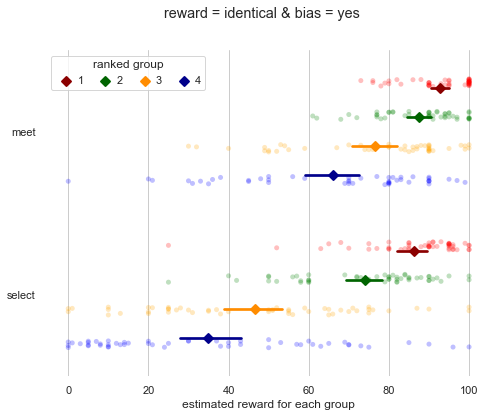

In [81]:
# reward estimate (rank reordered)

this_df = reorder_dollardf.loc[(reorder_dollardf['reward'] == 'identical') & (reorder_dollardf['bias'] == 'yes')]

# Initialize the figure
f, ax = plt.subplots()
f.set_size_inches(8,6)
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=True, alpha=.25, zorder=1,
             order=['meet','select'], palette=['red','green','orange','blue'])

# Show the conditional means
sns.pointplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=.532, join=False,
              markers="D", scale=.95, ci=95,
             order=['meet','select'], palette=['darkred','darkgreen','darkorange','darkblue'])
              
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="ranked group",
          handletextpad=0, columnspacing=1,
          loc="upper left", ncol=4, frameon=True)    

# Add title
f.suptitle('reward = identical & bias = yes')
ax.set_xlabel('estimated reward for each group')
ax.set_ylabel('')

Text(0, 0.5, '')

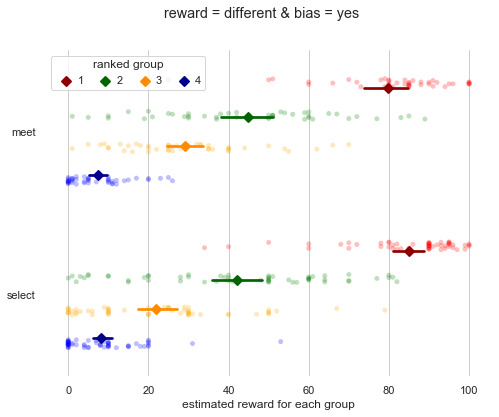

In [80]:
# reward estimate (rank reordered)

this_df = reorder_dollardf.loc[(reorder_dollardf['reward'] == 'different') & (reorder_dollardf['bias'] == 'yes')]

# Initialize the figure
f, ax = plt.subplots()
f.set_size_inches(8,6)
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=True, alpha=.25, zorder=1,
             order=['meet','select'], palette=['red','green','orange','blue'])

# Show the conditional means
sns.pointplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=.532, join=False,
              markers="D", scale=.95, ci=95,
             order=['meet','select'], palette=['darkred','darkgreen','darkorange','darkblue'])
              
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="ranked group",
          handletextpad=0, columnspacing=1,
          loc="upper left", ncol=4, frameon=True)    

# Add title
f.suptitle('reward = different & bias = yes')
ax.set_xlabel('estimated reward for each group')
ax.set_ylabel('')

Text(0, 0.5, '')

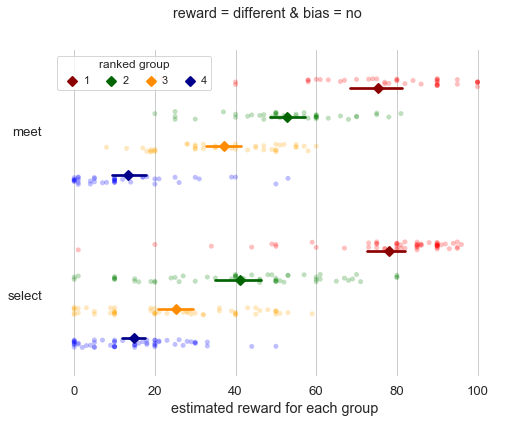

In [79]:
# reward estimate (rank reordered)

this_df = reorder_dollardf.loc[(reorder_dollardf['reward'] == 'different') & (reorder_dollardf['bias'] == 'no')]

# Initialize the figure
f, ax = plt.subplots()
f.set_size_inches(8,6)
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=True, alpha=.25, zorder=1,
             order=['meet','select'], palette=['red','green','orange','blue'])

# Show the conditional means
sns.pointplot(x="reward_estimate", y="sampling", hue="reorder",
              data=this_df, dodge=.532, join=False,
              markers="D", scale=.95, ci=95,
             order=['meet','select'], palette=['darkred','darkgreen','darkorange','darkblue'])
              
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="ranked group",
          handletextpad=0, columnspacing=1,
          loc="upper left", ncol=4, frameon=True)    

# Add title
f.suptitle('reward = different & bias = no')
ax.set_xlabel('estimated reward for each group')
ax.set_ylabel('')

#### Variable transformation - choice herfindhal & reward estimates variance

In [18]:
#reorder_choicedf
p_herf = []
for i in range (1,400):
    pp_df = reorder_choicedf.loc[reorder_choicedf['participant'] == i]['choice1'].tolist()
    if len(pp_df) == 4:
        p_herf.append(1 - ((pp_df[0]/40)**2 + (pp_df[1]/40)**2 + (pp_df[2]/40)**2 + (pp_df[3]/40)**2))
    elif len(pp_df) == 3:
        p_herf.append(1 - ((pp_df[0]/40)**2 + (pp_df[1]/40)**2 + (pp_df[2]/40)**2 + 0))
    elif len(pp_df) == 2:
        p_herf.append(1 - ((pp_df[0]/40)**2 + (pp_df[1]/40)**2 + 0 + 0))
    else:
        p_herf.append(1 - ((pp_df[0]/40)**2 + 0 + 0 + 0))


# reorder_dollardf.
p_var = []
for i in range(1,400):
    pp_df = reorder_dollardf.loc[reorder_dollardf['participant'] == i]['reward_estimate'].tolist()
    p_var.append(np.std(pp_df))

    
# transformed_df
DV_df = pd.DataFrame(list(zip(p_herf, p_var)),
              columns=['choice_herf', 'reward_var'])

IV_df = df_dollar.loc[df_dollar['group'] == 'Tufa'][['reward','bias','sampling','participant']].reset_index(drop=True)

transformed_df = pd.concat([IV_df, DV_df], axis=1)
transformed_df.to_csv('study1transformed.csv') # use for stats.R

#### Visualize main stats results

Text(0.5, 0.98, 'Partner choice herfindhal (diversity)')

<Figure size 432x288 with 0 Axes>

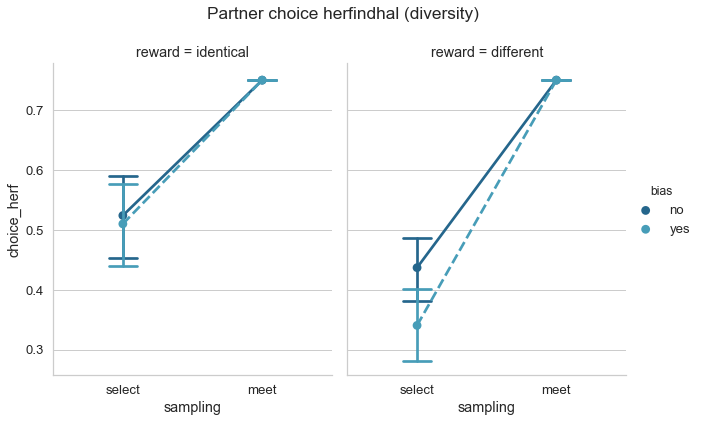

In [19]:
# transformed_df

# Choice
sns.set(style="whitegrid", font_scale=1.2)
sns.despine(bottom=True, left=True)

g = sns.catplot(x="sampling", y="choice_herf", hue="bias", col="reward",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", linestyles=["-", "--"], data=transformed_df)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Partner choice herfindhal (diversity)')

Text(0.5, 0.98, 'Reward estimate variance (stereotype dispersion)')

<Figure size 432x288 with 0 Axes>

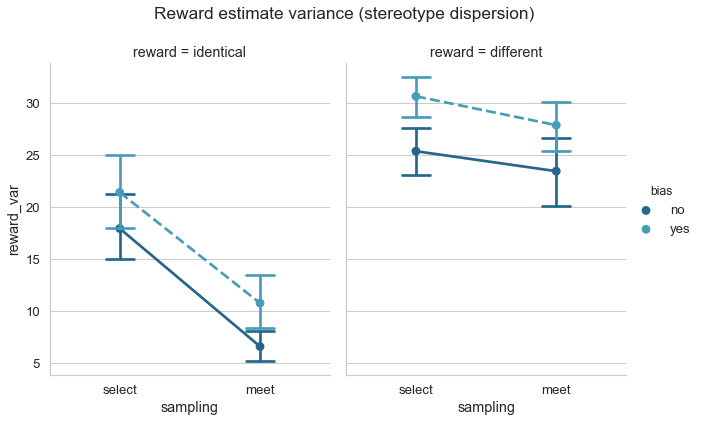

In [21]:
# transformed_df

# Choice
sns.set(style="whitegrid", font_scale=1.2)
sns.despine(bottom=True, left=True)

g = sns.catplot(x="sampling", y="reward_var", hue="bias", col="reward",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", linestyles=["-", "--"], data=transformed_df)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Reward estimate variance (stereotype dispersion)')

#### Exploratory results - Warmth and competence

Text(0.5, 0.98, 'Warmth and competence dispersion')

<Figure size 432x288 with 0 Axes>

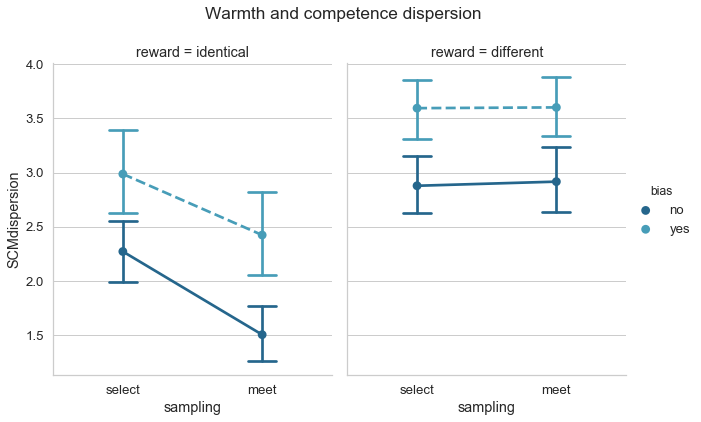

In [22]:
# read study1scm spreadsheet
scm_df = pd.read_excel('study1data.xlsx',sheet_name=4)

# Choice
sns.set(style="whitegrid", font_scale=1.2)
sns.despine(bottom=True, left=True)

g = sns.catplot(x="sampling", y="SCMdispersion", hue="bias", col="reward",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", linestyles=["-", "--"], data=scm_df)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Warmth and competence dispersion')